In [3]:

import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [4]:
results = earthaccess.search_datasets(instrument="oci")
for item in results:
    summary = item.summary()
    print(summary["short-name"])




PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3M_CHL_NRT
PACE_OCI_L3M_IOP_NRT
PACE_OCI_L3M_KD_NRT
PACE_OCI_L3M_PAR_NRT
PACE_OCI_L3M_POC_NRT
PACE_OCI_L3M_RRS_NRT


In [5]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_IOP_NRT",
    count=1,
)

In [6]:
tspan = ("2024-05-22", "2024-05-23")
bbox = (-76.75, 36.97, -75.74, 39.01)
clouds = (0, 50)

In [7]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_IOP_NRT",
    temporal=tspan,
    bounding_box=bbox,
    cloud_cover=clouds,
)

In [8]:
results[0]

Collection: {'Version': '2.0', 'ShortName': 'PACE_OCI_L2_IOP_NRT'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 47.47746, 'Longitude': -61.89199}, {'Latitude': 41.52162, 'Longitude': -95.06815}, {'Latitude': 24.36406, 'Longitude': -86.92741}, {'Latitude': 29.65719, 'Longitude': -60.46736}, {'Latitude': 47.47746, 'Longitude': -61.89199}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-05-22T17:37:48Z', 'EndingDateTime': '2024-05-22T17:42:47Z'}}
Size(MB): 53.02047824859619
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240522T173748.L2.OC_IOP.V2_0.NRT.nc']

In [9]:
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
paths

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240522T173748.L2.OC_IOP.V2_0.NRT.nc>]

In [27]:
dataset = xr.open_dataset(paths[-1])
dataset

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/47)
    title:                             OCI Level-2 Data IOP
    product_name:                      PACE_OCI.20240522T173748.L2.OC_IOP.V2_...
    processing_version:                2.0
    history:                           l2gen par=/data17/sdpsoper/vdc/vpu16/w...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_max:                -60.467358
    geospatial_lon_min:                -95.068146
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9755663275718689

In [28]:
datatree = open_datatree(paths[0])
datatree

<xarray.DataTree>
Group: /
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes: (12/47)
│       title:                             OCI Level-2 Data IOP
│       product_name:                      PACE_OCI.20240522T173748.L2.OC_IOP.V2_...
│       processing_version:                2.0
│       history:                           l2gen par=/data17/sdpsoper/vdc/vpu16/w...
│       instrument:                        OCI
│       platform:                          PACE
│       ...                                ...
│       geospatial_lon_max:                -60.467358
│       geospatial_lon_min:                -95.068146
│       startDirection:                    Ascending
│       endDirection:                      Ascending
│       day_night_flag:                    Day
│       earth_sun_distance_correction:     0.9755663275718689
├── Group: /sensor_band_parameters
│       Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
│                           wavelength_3d: 19)
│       Coordinates:
│         * wavelength_3d  (wavelength_3d) float64 152B 351.0 361.0 ... 678.0 711.0
│       Dimensions without coordinates: number_of_bands, number_of_reflective_bands
│       Data variables:
│           wavelength     (number_of_bands) float64 2kB ...
│           vcal_gain      (number_of_reflective_bands) float32 1kB ...
│           vcal_offset    (number_of_reflective_bands) float32 1kB ...
│           F0             (number_of_reflective_bands) float32 1kB ...
│           aw             (number_of_reflective_bands) float32 1kB ...
│           bbw            (number_of_reflective_bands) float32 1kB ...
│           k_oz           (number_of_reflective_bands) float32 1kB ...
│           k_no2          (number_of_reflective_bands) float32 1kB ...
│           Tau_r          (number_of_reflective_bands) float32 1kB ...
├── Group: /scan_line_attributes
│       Dimensions:  (number_of_lines: 1709)
│       Dimensions without coordinates: number_of_lines
│       Data variables:
│           year     (number_of_lines) float64 14kB ...
│           day      (number_of_lines) timedelta64[ns] 14kB ...
│           msec     (number_of_lines) timedelta64[ns] 14kB ...
│           detnum   (number_of_lines) float32 7kB ...
│           mside    (number_of_lines) float32 7kB ...
│           slon     (number_of_lines) float32 7kB ...
│           clon     (number_of_lines) float32 7kB ...
│           elon     (number_of_lines) float32 7kB ...
│           slat     (number_of_lines) float32 7kB ...
│           clat     (number_of_lines) float32 7kB ...
│           elat     (number_of_lines) float32 7kB ...
│           csol_z   (number_of_lines) float32 7kB ...
├── Group: /geophysical_data
│       Dimensions:      (number_of_lines: 1709, pixels_per_line: 1272,
│                         wavelength_3d: 19)
│       Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength_3d
│       Data variables: (12/13)
│           a            (number_of_lines, pixels_per_line, wavelength_3d) float32 165MB ...
│           bb           (number_of_lines, pixels_per_line, wavelength_3d) float32 165MB ...
│           aph          (number_of_lines, pixels_per_line, wavelength_3d) float32 165MB ...
│           Kd           (number_of_lines, pixels_per_line, wavelength_3d) float32 165MB ...
│           adg_442      (number_of_lines, pixels_per_line) float32 9MB ...
│           adg_s        (number_of_lines, pixels_per_line) float32 9MB ...
│           ...           ...
│           bbp_s        (number_of_lines, pixels_per_line) float32 9MB ...
│           rrsdiff      (number_of_lines, pixels_per_line) float32 9MB ...
│           aph_unc_442  (number_of_lines, pixels_per_line) float32 9MB ...
│           adg_unc_442  (number_of_lines, pixels_per_line) float32 9MB ...
│           bbp_unc_442  (number_of_lines, pixels_per_line) float32 9MB ...
│           l2_flags     (number_of_lines, pixels_per_line) int32 9MB ...
├── Group: /navigatio

In [13]:
dataset = xr.merge(datatree.to_dict().values())
dataset

<xarray.Dataset> Size: 757MB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 19, number_of_lines: 1709,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 152B 351.0 361.0 ... 678.0 711.0
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/37)
    wavelength     (number_of_bands) float64 2kB ...
    vcal_gain      (number_of_reflective_bands) float32 1kB ...
    vcal_offset    (number_of_reflective_bands) float32 1kB ...
    F0             (number_of_reflective_bands) float32 1kB ...
    aw             (number_of_reflective_bands) float32 1kB ...
    bbw            (number_of_reflective_bands) float32 1kB ...
    ...             ...
    adg_unc_442    (number_of_lines, pixels_per_line) float32 9MB ...
    bbp_unc_442    (number_of_lines, pixels_per_line) float32 9MB ...
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB ...
    longitude      (number_of_lines, pixels_per_line) float32 9MB ...
    latitude       (number_of_lines, pixels_per_line) float32 9MB ...
    tilt           (number_of_lines) float32 7kB ...
Attributes: (12/47)
    title:                             OCI Level-2 Data IOP
    product_name:                      PACE_OCI.20240522T173748.L2.OC_IOP.V2_...
    processing_version:                2.0
    history:                           l2gen par=/data17/sdpsoper/vdc/vpu16/w...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_max:                -60.467358
    geospatial_lon_min:                -95.068146
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9755663275718689

In [14]:
dataset = dataset.set_coords(("longitude", "latitude"))
dataset

<xarray.Dataset> Size: 757MB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 19, number_of_lines: 1709,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 152B 351.0 361.0 ... 678.0 711.0
    longitude      (number_of_lines, pixels_per_line) float32 9MB ...
    latitude       (number_of_lines, pixels_per_line) float32 9MB ...
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/35)
    wavelength     (number_of_bands) float64 2kB ...
    vcal_gain      (number_of_reflective_bands) float32 1kB ...
    vcal_offset    (number_of_reflective_bands) float32 1kB ...
    F0             (number_of_reflective_bands) float32 1kB ...
    aw             (number_of_reflective_bands) float32 1kB ...
    bbw            (number_of_reflective_bands) float32 1kB ...
    ...             ...
    rrsdiff        (number_of_lines, pixels_per_line) float32 9MB ...
    aph_unc_442    (number_of_lines, pixels_per_line) float32 9MB ...
    adg_unc_442    (number_of_lines, pixels_per_line) float32 9MB ...
    bbp_unc_442    (number_of_lines, pixels_per_line) float32 9MB ...
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB ...
    tilt           (number_of_lines) float32 7kB ...
Attributes: (12/47)
    title:                             OCI Level-2 Data IOP
    product_name:                      PACE_OCI.20240522T173748.L2.OC_IOP.V2_...
    processing_version:                2.0
    history:                           l2gen par=/data17/sdpsoper/vdc/vpu16/w...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_max:                -60.467358
    geospatial_lon_min:                -95.068146
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9755663275718689

In [31]:
bbp_442_at_coords = dataset.Variables["bbp_442"]


AttributeError: 'Dataset' object has no attribute 'Variables'

In [15]:
def pcolormesh(rgb):
    fig = plt.figure()
    axes = plt.subplot()
    artist = axes.pcolormesh(
        rgb["longitude"],
        rgb["latitude"],
        rgb,
        shading="nearest",
        rasterized=True,
    )
    axes.set_aspect("equal")

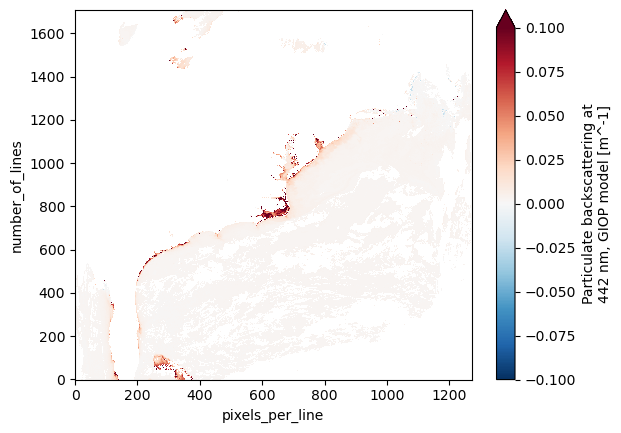

In [16]:
artist = dataset["bbp_442"].plot(vmax=0.1)

In [19]:
coordinates = {
    "point1": ( 37.586667,  -76.300556),
    "point2": (37.241667, -76.371389),
    "point3": (36.987222,  -76.279722)
}

In [18]:
lat, lon = dataset['latitude'], dataset['longitude']


In [20]:
latlon = np.stack([lat,lon],-1)
dists = np.linalg.norm(latlon - np.array(list(coordinates['point1'])),axis=-1)
min_dist_idx = np.argmin(dists)
min_dist_y = min_dist_idx // dists.shape[1]
min_dist_x = min_dist_idx % dists.shape[1]

In [21]:
latlon[min_dist_y,min_dist_x]

array([ 37.583176, -76.30104 ], dtype=float32)

In [22]:
coordinates2=[
 {'latitude': 37.583176, 'longitude': -76.30104}]

In [26]:
bbp_442_at_coords = dataset["bbp_442"].sel(latitude= 37.583176, longitude=-76.30104)


KeyError: "no index found for coordinate 'latitude'"